# SPECFEM Users Workshop -- Day 3 (Oct. 7, 2022)

## Part 3C: Introduction to SeisFlows

- In this notebook we will introduce two open-source Python packages for facilitating/automating seismic imaging  
- **Objective**: To introduce and tour around SeisFlows and Pyatoa, and see how they can be used to simplify working with SPECFEM     
- These instructions should be run from inside a Docker container, using Jupyter Lab (see instructions [here](https://github.com/adjtomo/adjdocs/blob/main/readmes/docker_image_install.md)).  
-----------

**Relevant Links:** 
- Today's Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_3c_intro_seisflows.ipynb
- Completed Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_3c_intro_seisflows.ipynb
- Day 0 Notebook (Container Testing): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_0_container_testing.ipynb
- Day 1A Notebook (Intro SPECFEM): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_1a_intro_specfem2d.ipynb
- Day 1B Notebook (Fwd. Simulations): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_1b_forward_simulations.ipynb
- Day 2A Notebook (Adj. Simulations): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_2a_kernels.ipynb
- Day 3A Notebook (Simple Imaging): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_3a_imaging_simple.ipynb
- Day 3C Notebook (Advanced Imaging): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_3a_imaging_adv.ipynb

**adjTomo Software Suite:** 
- adjTomo: https://github.com/adjtomo
- SeisFlows GitHub Page: https://github.com/adjtomo/seisflows
- SeisFlows Documentation: https://seisflows.readthedocs.io/en/latest/
- Pyatoa GitHub Page: https://github.com/adjtomo/pyatoa
- Pyatoa Documentation: https://pyatoa.readthedocs.io/en/latest/


**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.


----------
## 0) Motivation

- Full waveform inversion / adjoint tomography is an algorithmically and computationally complex procedure  
- For real-world regional scale inversion, the number of events and stations can range from tens to hundreds  
- For 3 component seismograms, this can reach tens of thousands of waveforms and misfit quantification calculations over the course of hundreds of simulations  
- Automated workflow tools cut down on human time and operator error when running repetitive and iterative inversions  
- They also free up research time to focus on details of an inversion, rather than implementation  

![fwi_workflow](https://user-images.githubusercontent.com/23055374/194435095-8def121f-edc7-4408-be46-c0b84352ac6c.png)


### SeisFlows

- SeisFlows is one available tool for automating forward and adjoint simulations, as well as seismic inversions. 
- It comes with a built-in command line tool, and is written completely in Python  
- It provides `system` modules that allow it to interact with a variety of compute systems (laptops to HPC) using the same interface  
- SPECFEM2D and local capabilities allow quick prototyping and facilitate transition to 3D runs on clusters

### Pyatoa

- *Python's Adjoint Tomography Operations Assistant*: an ObsPy-like Python package used for misfit quantification  
- High-level wrapper for Pyflex, Pyadjoint, PyASDF, Pandas and ObsPy, all focused on the seismic imaging problem  
- Takes care of visualization and inversion assessment, implemented directly in the SeisFlows package but also operates as a standalone package 
- Motivated by tools and functionality I wish I had when performing a seismic inversion  

In [1]:
! seisflows -h

usage: seisflows [-h] [-w [WORKDIR]] [-p [PARAMETER_FILE]]
                 {setup,configure,swap,submit,resume,restart,clean,par,sempar,check,init,plot2d,plotst,print,reset,debug,examples}
                 ...


                     SeisFlows: Waveform Inversion Package                      


options:
  -h, --help            show this help message and exit
  -w [WORKDIR], --workdir [WORKDIR]
                        The SeisFlows working directory, default: cwd
  -p [PARAMETER_FILE], --parameter_file [PARAMETER_FILE]
                        Parameters file, default: 'parameters.yaml'

command:
  Available SeisFlows arguments and their intended usages

    setup               Setup working directory from scratch
    configure           Fill parameter file with defaults
    swap                Swap module parameters in an existing parameter file
    submit              Submit initial workflow to system
    resume              Re-submit previous workflow to system
    restart            

---------
## 1) Automating the Forward Problem

- We'll first show how SeisFlows automates the forward problem  
- Users will need to supply starting model as well as real data or a target model  
- A single `parameters.yaml` file controls all of the SeisFlows workflow  

### 1a) Setting Up a SeisFlows Example Problem

- This setup procedure does exactly what we did in Day 1B, takes the Tape 2007 example problem and runs a forward simulation 
- This particular example uses the perturbation checkerboard model as the underlying model  
- See https://seisflows.readthedocs.io/en/devel/specfem2d_example.html for more examples
- See https://seisflows.readthedocs.io/en/devel/2D_example_walkthrough.html to figure out what's going on under the hood  

In [2]:
# Required Python packages for today's notebook
from pyasdf import ASDFDataSet
from pyatoa import Inspector
from IPython.display import Image

In [3]:
# Make sure we're in an empty working directory
! rm -r /home/scoped/work/day_3/intro_seisflows/example_3
! mkdir -p /home/scoped/work/day_3/intro_seisflows/example_3

%cd /home/scoped/work/day_3/intro_seisflows/example_3

# Setup Example 3, en-masse forward simulations. Don't run
! seisflows examples setup 3 -r  /home/scoped/specfem2d/ --with_mpi --nproc 1

rm: cannot remove '/home/scoped/work/day_3/intro_seisflows/example_3': No such file or directory
/home/scoped/work/day_3/intro_seisflows/example_3

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(   

In [4]:
# Under the hood, the example SETUP procedure has run a forward simulation to generate our starting model  
! ls 
! echo
# Similar to the working directories we have been using during Days 1-3
! ls specfem2d_workdir
! echo
# OUTPUT_FILES contains model parameters
! ls specfem2d_workdir/OUTPUT_FILES_INIT
! echo
# 
! ls specfem2d_workdir/OUTPUT_FILES_INIT/*.bin

parameters.yaml  specfem2d_workdir

bin  DATA  OUTPUT_FILES  OUTPUT_FILES_INIT

AA.S0001.BXY.semd	    forward_image000004200.jpg
Database00000.bin	    forward_image000004400.jpg
forward_image000000005.jpg  forward_image000004600.jpg
forward_image000000200.jpg  forward_image000004800.jpg
forward_image000000400.jpg  forward_image000005000.jpg
forward_image000000600.jpg  mesher.log.txt
forward_image000000800.jpg  mesh_materials.vtk
forward_image000001000.jpg  mesh_partition_number.vtk
forward_image000001200.jpg  output_list_stations.txt
forward_image000001400.jpg  plot_points_per_wavelength_histogram.gnu
forward_image000001600.jpg  plot_source_time_function.txt
forward_image000001800.jpg  points_per_wavelength_histogram_S_in_solid.txt
forward_image000002000.jpg  proc000000_data.bin
forward_image000002200.jpg  proc000000_jacobian.bin
forward_image000002400.jpg  proc000000_NSPEC_ibool.bin
forward_image000002600.jpg  proc000000_receivers_info.bin
forward_image000002800.jpg  proc000000_rho.bi

### 1b) The SeisFlows `parameters.yaml` file

- Similar to the SPECFEM `Par_file`, the SeisFlows `parameters.yaml` file controls the SeisFlows workflow
- Each 'module' of SeisFlows has a separate set of parameters
- The 'modules' of SeisFlows include: 
    - **Workflow:** the type of workflow and collection of tasks to run (e.g., forward, migration, inversion)  
    - **System:** controls interaction with the compute system (e.g., workstation, Slurm, Chinook)   
    - **Solver:** choose *which* external solver SeisFlows will interact with (i.e, specfem2d, 3d, 3d_globe (W.I.P.))
    - **Preprocess:** the preprocessing module to use for generating adjoint sources (i.e, default, Pyaflowa)
    - **Optimize:** the nonlinear optimization algorithm to use for model updates (e.g., gradient descent, L-BFGS)

In [5]:
# Looking at the available modules
! head -n 33 parameters.yaml


# //////////////////////////////////////////////////////////////////////////////
#
#                        SeisFlows YAML Parameter File
#
# //////////////////////////////////////////////////////////////////////////////
#
# Modules correspond to the structure of the source code, and determine
# SeisFlows' behavior at runtime. Each module requires its own sub-parameters.
#
# .. rubric::
#   - Determine available options for modules by running:
#       > seisflows print modules
#   - Auto-fill with docstrings and default values (recommended) by running:
#       > seisflows configure
#   - Swap out module parameters for a configured parameter file by running:
#       > seisflows swap {module} {name} (e.g., seisflows swap solver specfem3d)
#   - To set values as NoneType, use: null
#   - To set values as infinity, use: inf
#
#                                    MODULES
#                                    ///////
# workflow (str):    The types and order of functions for running SeisFlows

In [6]:
# Workflow: Forward parameters
! head -n 76 parameters.yaml | tail -n 43

# =============================================================================
#
#    Forward Workflow
#    ----------------
#    Defines foundational structure for Workflow module. When used standalone 
#    is in charge of running forward solver in parallel and (optionally) 
#    calculating data-synthetic misfit and adjoint sources.
#
#    Parameters
#    ----------
#    :type modules: list of module
#    :param modules: instantiated SeisFlows modules which should have been
#        generated by the function `seisflows.config.import_seisflows` with a
#        parameter file generated by seisflows.configure
#    :type data_case: str
#    :param data_case: How to address 'data' in the workflow, available options:
#        'data': real data will be provided by the user in
#        `path_data/{source_name}` in the same format that the solver will
#        produce synthetics (controlled by `solver.format`) OR
#        synthetic': 'data' will be generated as synthetic seismograms using
#

In [7]:
# Solver: SPECFEM2D parameters
! head -n 179 parameters.yaml | tail -n 70

# =============================================================================
#
#    Solver SPECFEM
#    --------------
#    Defines foundational structure for Specfem-based solver module. 
#    Generalized SPECFEM interface to manipulate SPECFEM2D/3D/3D_GLOBE w/ Python
#
#    Parameters
#    ----------
#    :type data_format: str
#    :param data_format: data format for reading traces into memory.
#        Available: ['SU': seismic unix format, 'ASCII': human-readable ascii]
#    :type materials: str
#    :param materials: Material parameters used to define model. Available:
#        ['ELASTIC': Vp, Vs, 'ACOUSTIC': Vp, 'ISOTROPIC', 'ANISOTROPIC']
#    :type density: bool
#    :param density: How to treat density during inversion. If True, updates
#        density during inversion. If False, keeps it constant.
#        TODO allow density scaling during an inversion
#    :type attenuation: bool
#    :param attenuation: How to treat attenuation during inversion.
#        if True, turns

### 1c) Shared `DATA/` Directory

- SeisFlows borrows files from the SPECFEM *DATA/* directory but requires some special formatting  
- SeisFlows will look for `ntask` events with the prefix `source_prefix`

In [8]:
! seisflows par ntask
! seisflows par source_prefix

ntask: 10
source_prefix: SOURCE


- For example, in SPECFEM2D with source prefix 'SOURCE', it will look for files called 'SOURCE_*'  
- The suffix can be event names, id numbers etc. They will be used to create solver directories during the workflow  

#### Required Paths

- SeisFlows needs to know the path to the *DATA/* directory to grab these files  
- SeisFlows also needs to know the path to the *bin/* directory so it can run SPECFEM executables  
- Finally, SeisFlows needs to know the path to your **model** files. The User is responsible for generating their mesh and model!  
- Additionally, SeisFlows maintains its own internal directory structure  

In [9]:
! tail -n 60 parameters.yaml

# =============================================================================
#
#	 Paths
#	 -----
#    :type workdir: str
#    :param workdir: working directory in which to perform a SeisFlows workflow.
#        SeisFlows internal directory structure will be created here. Default cwd
#    :type path_output: str
#    :param path_output: path to directory used for permanent storage on disk.
#        Results and exported scratch files are saved here.
#    :type path_data: str
#    :param path_data: path to any externally stored data required by the solver
#    :type path_state_file: str
#    :param path_state_file: path to a text file used to track the current
#        status of a workflow (i.e., what functions have already been completed),
#        used for checkpointing and resuming workflows
#    :type path_model_init: str
#    :param path_model_init: path to the starting model used to calculate the
#        initial misfit. Must match the expected `solver_io` format.
#    :type path_

### 1d) Swapping Modules

- SeisFlows can easily 'swap' modules from one to another  
- Used to facilitate the transition from a 2D, local, development environment, to a 3D HPC run  
- Replaces parameter set for **one** module only, leaving the others the same 

In [10]:
! seisflows print m

usage: seisflows print [-h] [choice] [args ...]

Print information related to an active environment

    modules       List available module names for all available packages
    flow          Print out the workflow.main() flow arguments
    inherit       Track inheritance chain for all modules, determine method 
                  ownership for a given function. 
                  seisflows print inherit {optional module} {optional function}
                  e.g., seisflows inherit workflow main
                    

positional arguments:
  choice      Parameter, state, or value to check
  args        Generic arguments passed to check functions

options:
  -h, --help  show this help message and exit


In [11]:
! seisflows par preprocess

preprocess: null


In [12]:
! seisflows swap preprocess default

created parameter file: parameters.yaml
configuring SeisFlows parameter file


In [13]:
! head -252 parameters.yaml | tail -n 73

# =============================================================================
#
#    Default Preprocess
#    ------------------
#    Data processing for seismic traces, with options for data misfit,
#    filtering, normalization and muting.
#
#    Parameters
#    ----------
#    :type data_format: str
#    :param data_format: data format for reading traces into memory. For
#        available see: seisflows.plugins.preprocess.readers
#    :type misfit: str
#    :param misfit: misfit function for waveform comparisons. For available
#        see seisflows.plugins.preprocess.misfit
#    :type backproject: str
#    :param backproject: backprojection function for migration, or the
#        objective function in FWI. For available see
#        seisflows.plugins.preprocess.adjoint
#    :type normalize: str
#    :param normalize: Data normalization parameters used to normalize the
#        amplitudes of waveforms. Choose from two sets:
#        ENORML1: normalize per event by L1 of traces; OR

In [14]:
# Re-setting the preprocess module to None
! seisflows swap preprocess null

created parameter file: parameters.yaml
configuring SeisFlows parameter file


### 1e) Submit a Workflow

- Independent of your system, workflow etc., SeisFlows has only one entry point for running a workflow (`seisflows submit`)
- Under the hood, SeisFlows is doing what we manually did in the workshop, i.e., 
    - Generating working directories for each source
    - Checking acceptability of model parameters  
    - Setting the parameter file correctly for a forward simulation  
    - Running `xmeshfem2D` and `xspecfem2D` for each of the 10 sources  
 

In [15]:
! seisflows submit

2022-10-07 01:23:41 (D) | MPI executable is located at: /opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/bin/mpirun
2022-10-07 01:23:41 (W) | optional module 'preprocess' has not been instantiated, some functionality of the 'Forward' workflow may be skipped
2022-10-07 01:23:41 (W) | `workflow.data_case` is None, SeisFlows will not be able to find data for data-synthetic comparison
2022-10-07 01:23:41 (I) | 
                          SETTING UP FORWARD WORKFLOW                           
2022-10-07 01:23:45 (D) | running setup for module 'system.Workstation'
2022-10-07 01:23:47 (D) | copying par/log file to: /home/scoped/work/day_3/intro_seisflows/example_3/logs/sflog_001.txt
2022-10-07 01:23:47 (D) | copying par/log file to: /home/scoped/work/day_3/intro_seisflows/example_3/logs/parameters_001.yaml
2022-10-07 01:23:47 (D) | running setup for module 'solver.Specfem2D'
2022-10-07 01:23:47 (I) | initializing 10 solver directories
2022-10-07 01:23:47 (D) | initializing solve

The workflow will be **complete** after it runs `xspecfem2D` for `source 010`

### 1f) Understanding a SeisFlows Working Directory

- Similar to SPECFEM, SeisFlows outputs log files, and output files  
- Most of the heavy lifting is done in the *scratch/* directory  
- Any files that should be saved permanently (seismograms, updated models during inversion) are storred in the *output/* directory  
- Any important log information (previously-used parameter files, error messages) are stored in the *logs/* directory  
- SeisFlows has an internal checkpointing routine, which takes advantage of the *sflog.txt* **state** file  
- See https://seisflows.readthedocs.io/en/devel/working_directory.html for more details

In [16]:
# All of the SeisFlows workflow is contained here
! ls

logs	parameters.yaml  sflog.txt    specfem2d_workdir
output	scratch		 sfstate.txt


MODEL_INIT  solver

proc000000_vp.bin  proc000000_vs.bin  proc000000_x.bin	proc000000_z.bin
Figure(707.107x707.107)


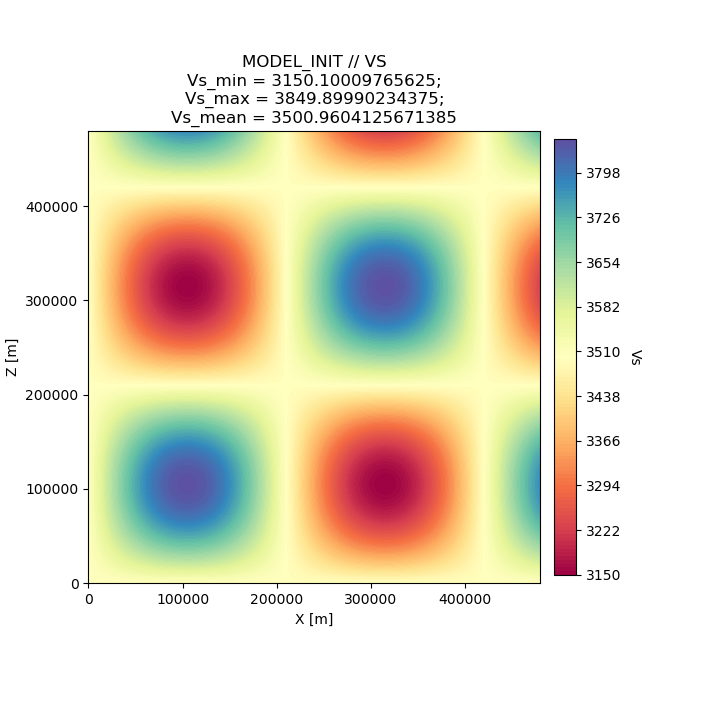

In [17]:
# Model files are stored in the output/ directory
! ls output
! echo
! ls output/MODEL_INIT

# We can use SeisFlows command line tools to plot the initial model
! seisflows plot2d MODEL_INIT vs --save m_init_vs.png
Image("m_init_vs.png")

001  002  003  004  005  006  007  008	009  010

syn

AA.S000000.BXY.semd  AA.S000009.BXY.semd  AA.S000018.BXY.semd
AA.S000001.BXY.semd  AA.S000010.BXY.semd  AA.S000019.BXY.semd
AA.S000002.BXY.semd  AA.S000011.BXY.semd  AA.S000020.BXY.semd
AA.S000003.BXY.semd  AA.S000012.BXY.semd  AA.S000021.BXY.semd
AA.S000004.BXY.semd  AA.S000013.BXY.semd  AA.S000022.BXY.semd
AA.S000005.BXY.semd  AA.S000014.BXY.semd  AA.S000023.BXY.semd
AA.S000006.BXY.semd  AA.S000015.BXY.semd  AA.S000024.BXY.semd
AA.S000007.BXY.semd  AA.S000016.BXY.semd
AA.S000008.BXY.semd  AA.S000017.BXY.semd


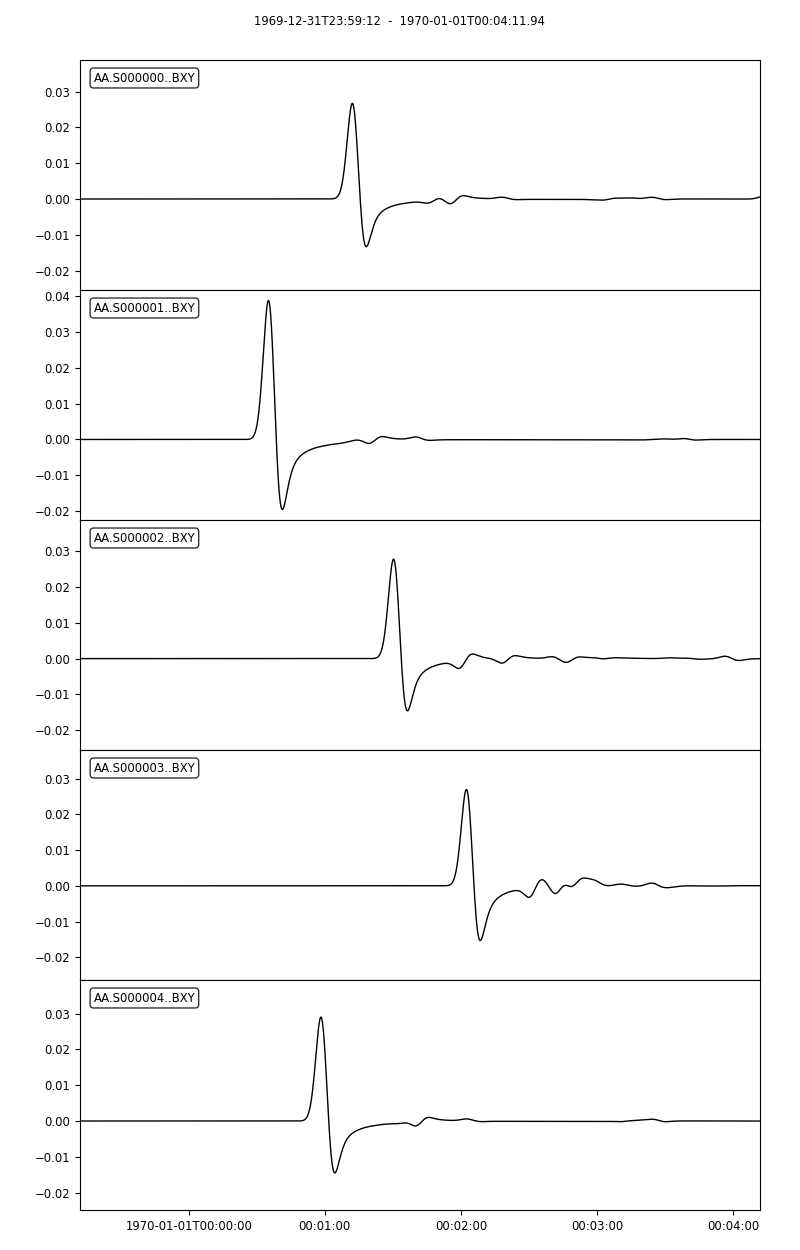

In [18]:
# Synthetic seismograms output by the solvers are stored here as well
! ls output/solver
! echo
! ls output/solver/001
! echo
! ls output/solver/001/syn

# We can use the SeisFlows command line tool to plot synthetics
! seisflows plotst output/solver/001/syn/AA.S00000[0-4].BXY.semd --save s_01_synthetics.png
Image("s_01_synthetics.png")

### `scratch/` directory

- The active working directory of SeisFlows where all of the heavy lifting takes place  
- Each module in the SeisFlows package may have it’s own sub-directory where it stores temporary work data  
- Additionally, we have two eval*/ directories where objective function evaluation (eval_func) and gradient evaluation (eval_grad) files are stored  

In [19]:
! ls scratch

eval_grad  solver  system


In [20]:
! ls scratch/solver

001  002  003  004  005  006  007  008	009  010  mainsolver


In [21]:
# Each solver directory is simply a SPECFEM workding directory controlled by SeisFlows
# The main solver is used for tasks which are not mandatory for all events (e.g., smoothing)  
! ls scratch/solver/mainsolver

bin  DATA  fwd_mesher.log  fwd_solver.log  OUTPUT_FILES  traces


--------------
## 2) Re-create a Kernel from Tape et al. 2007

- In this example we're going to try to re-create a part of a published figure  
- We are using the Tape 2007 example, which was introduced in Days 2 and 3 (homogeneous halfspace vs. checkerboard model)  
- See [SeisFlows Example \#2a docs page](https://seisflows.readthedocs.io/en/devel/specfem2d_example.html#re-creating-kernels-from-tape-et-al-2007) for guidance on what is going on    
- This example uses `Pyatoa` for waveform processing  
- **NOTE**: You can choose which event ID you're running by changing the integer after `--event_id`. Tape et al. show results for Event IDs 1 through 7  

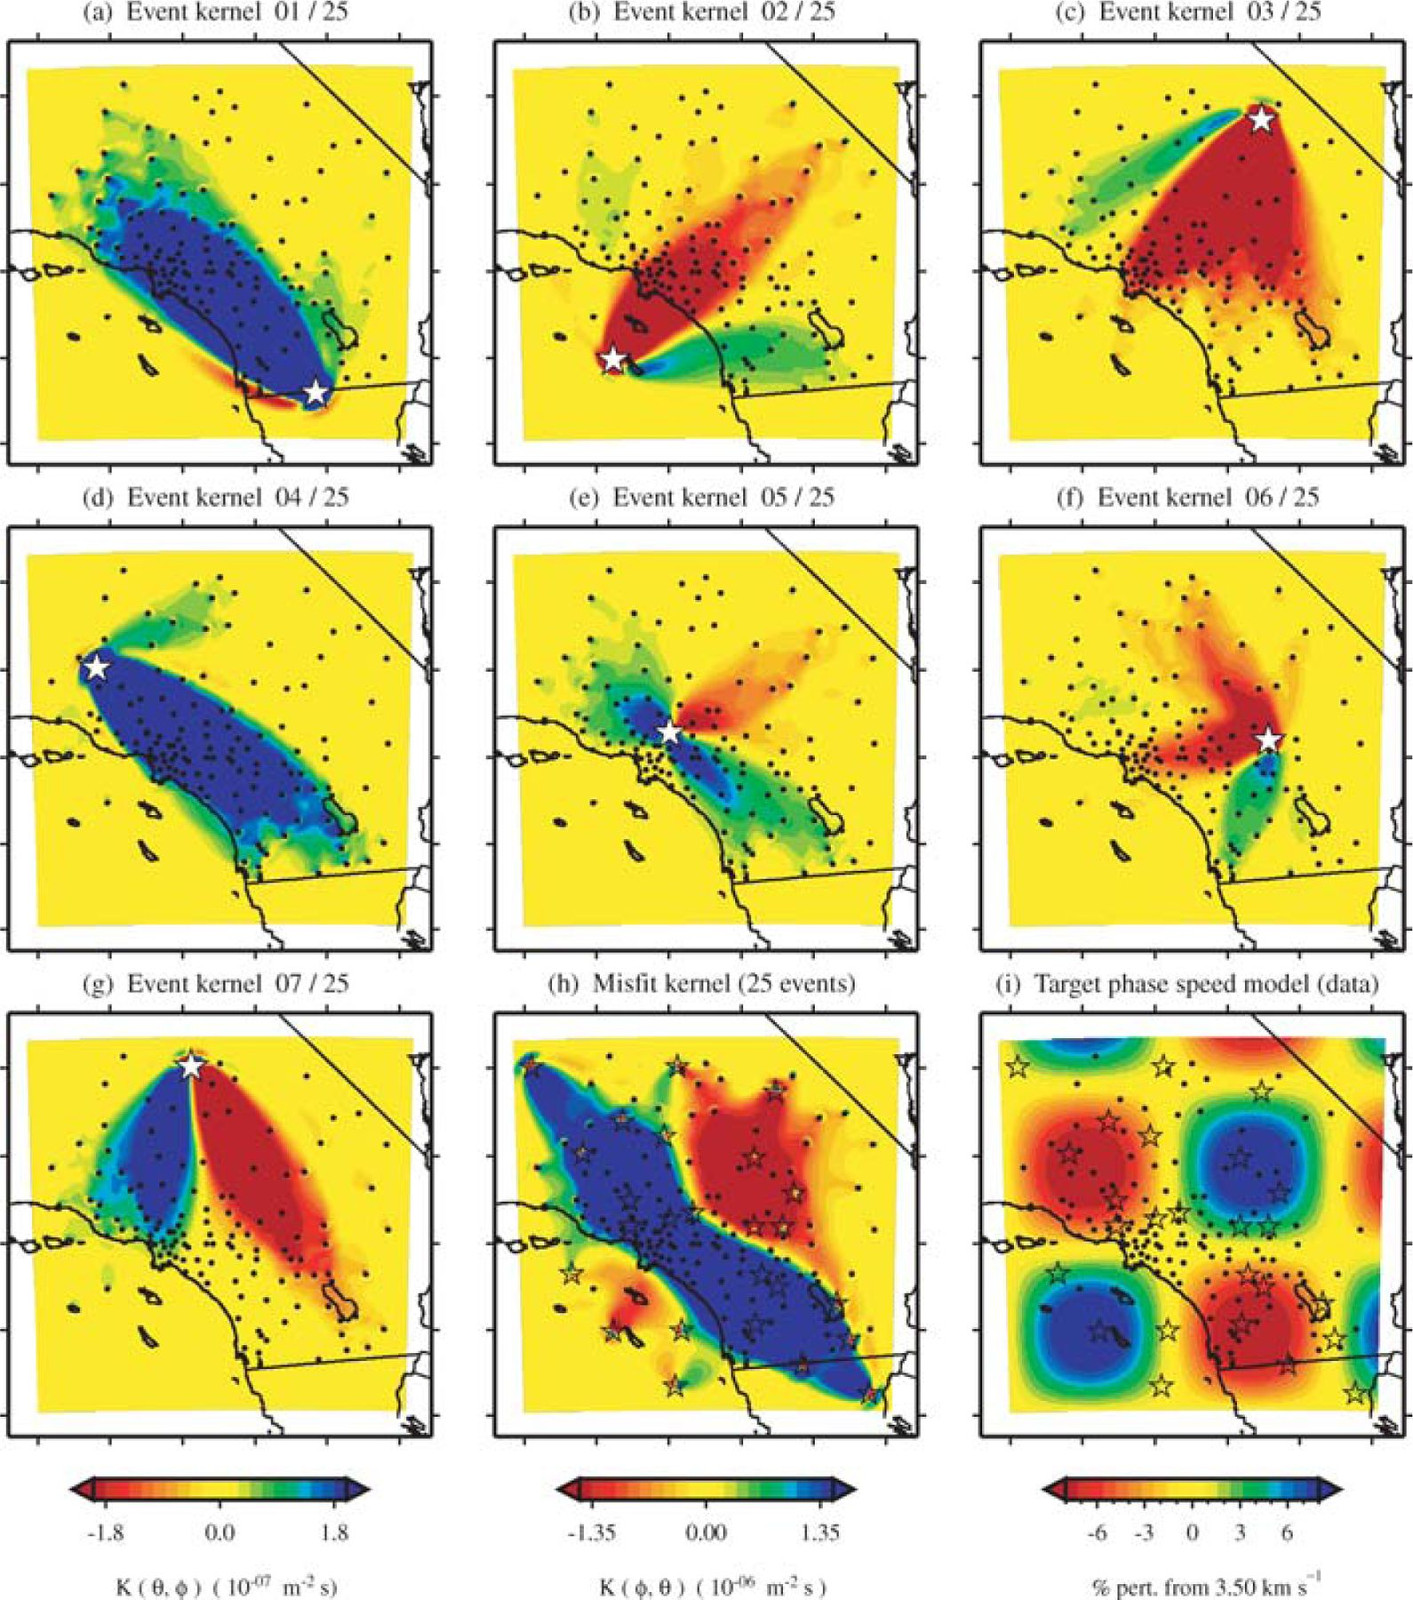
Caption from publication: *Construction of a misfit kernel. (a)–(g) Individual event kernels, each constructed via the method shown in Fig. 8 (which shows Event 5). The colour scale for each event kernel is shown beneath (g). (h) The misfit kernel is simply the sum of the 25 event kernels. (i) The source–receiver geometry and target phase‐speed model. There are a total of N= 25 × 132 = 3300 measurements that are used in constructing the misfit kernel (see Section 5).*

In [22]:
# Run the example problem
! rm -r /home/scoped/work/day_3/intro_seisflows/example_2a
! mkdir -p /home/scoped/work/day_3/intro_seisflows/example_2a

%cd /home/scoped/work/day_3/intro_seisflows/example_2a

# Setup the example problem and run Example 2
! seisflows examples setup 2 -r /home/scoped/specfem2d --with_mpi --niter 1 --event_id 7  # <-- Choose your event by changing this value
! seisflows par stop_after evaluate_gradient_from_kernels  # Tell SeisFlows to stop mid-inversion
! seisflows submit

rm: cannot remove '/home/scoped/work/day_3/intro_seisflows/example_2a': No such file or directory
/home/scoped/work/day_3/intro_seisflows/example_2a

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@( 

------------
You'll know the example problem is finished when you see the following message
```bash
2022-10-07 00:29:02 (I) | stop workflow at `stop_after`: evaluate_gradient_from_kernels
```

Figure(707.107x707.107)


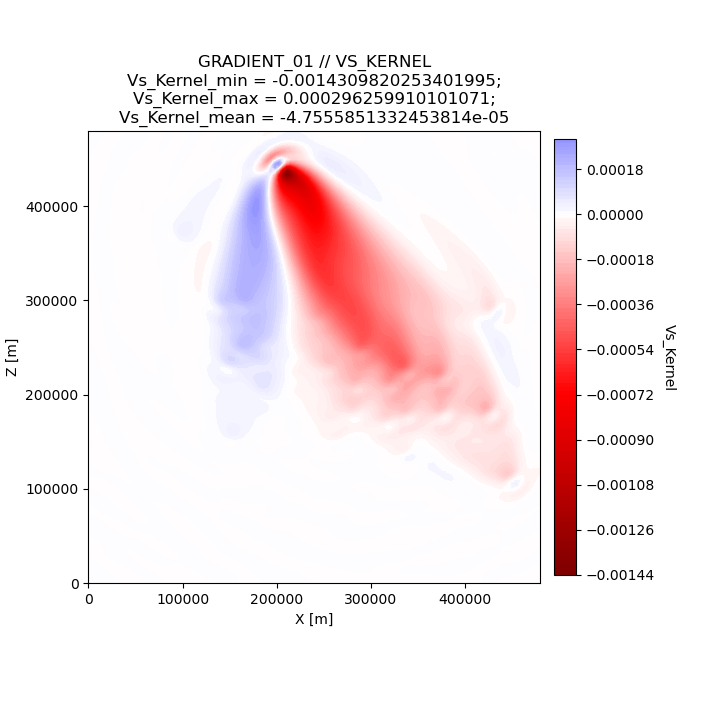

In [23]:
# Plots the gradient output by SeisFlows, compare to the figure above
! seisflows plot2d GRADIENT_01 vs_kernel --savefig g_01_vs.png
Image("g_01_vs.png")

### 2a) Understanding `Pyaflowa` Outputs

- Pyaflowa is the name given to the SeisFlows module which takes advantage of Pyatoa to perform preprocessing  
- Pyaflowa generates outputs each time misfit is quantified, which you can use to understand your workflow  
- Because we *stopped* our workflow prematurely, Pyaflowa's files are still in the *scratch/* directory  
- In a normally operating inversion, these files would be exported to the *output/* directory  

In [24]:
! ls scratch/preprocess

datasets  figures  logs


In [25]:
# Waveform misfit figures are saved for each source-receiver pair
! ls scratch/preprocess/figures

007_i01_s00.pdf


>__NOTE:__ Since this is a PDF file, we'll have to navigate to `home -> work -> example_2a -> output -> pyaflowa -> figures` to visualize

In [26]:
# Pyatoa Log files define the misfit quantification procedure for each event
! ls scratch/preprocess/logs
! echo
! head -75 scratch/preprocess/logs/007_i01_s00.log

007_i01_s00.log  tmp

[2022-10-07 01:27:08] - pyatoa - INFO: 
                                    SUMMARY                                     
SOURCE NAME: 007
WINDOWS: 0
RAW MISFIT: 64.0494

                                    RAW LOGS                                    
[2022-10-07 01:27:01] - pyatoa - INFO: 
////////////////////////////////////////////////////////////////////////////////
                                 AA.S000000.*.*                                 
////////////////////////////////////////////////////////////////////////////////
[2022-10-07 01:27:01] - pyatoa - INFO: first evaluation of workflow, selecting new windows
[2022-10-07 01:27:01] - pyatoa - INFO: gathering event QuakeML
[2022-10-07 01:27:01] - pyatoa - DEBUG: searching local filesystem for QuakeML
[2022-10-07 01:27:01] - pyatoa - DEBUG: searching for event data: /home/scoped/work/day_3/intro_seisflows/example_2a/specfem2d_workdir/DATA/SOURCE_007
[2022-10-07 01:27:01] - pyatoa - DEBUG: found SPECFEM2D SOUR

### 2c) Pyatoa Stores Data in ASDFDataSets

- All waveform data, misfit windows (if available) and adjoint sources are stored in ASDFDataSets  
- ASDFDataSets are hierarchical data storage files for seismic data (built on HDF5)  
- For more information see: https://pyatoa.readthedocs.io/en/devel/storage.html

In [27]:
# All waveform data, misfit windows (if available) and adjoint sources are stored in ASDFDataSets
! ls scratch/preprocess/datasets
ds = ASDFDataSet("scratch/preprocess/datasets/007.h5")
print(ds)

007.h5
ASDF file [format version: 1.0.3]: 'scratch/preprocess/datasets/007.h5' (3.6 MB)
	Contains 1 event(s)
	Contains waveform data from 32 station(s).
	Contains 1 type(s) of auxiliary data: AdjointSources


['AA.S000000', 'AA.S000001', 'AA.S000002', 'AA.S000003', 'AA.S000004', 'AA.S000005', 'AA.S000006', 'AA.S000007', 'AA.S000008', 'AA.S000009', 'AA.S000010', 'AA.S000011', 'AA.S000012', 'AA.S000013', 'AA.S000014', 'AA.S000015', 'AA.S000016', 'AA.S000017', 'AA.S000018', 'AA.S000019', 'AA.S000020', 'AA.S000021', 'AA.S000022', 'AA.S000023', 'AA.S000024', 'AA.S000025', 'AA.S000026', 'AA.S000027', 'AA.S000028', 'AA.S000029', 'AA.S000030', 'AA.S000031']

Contents of the data set for station AA.S000000:
    - Has no StationXML file
    - 2 Waveform Tag(s):
        observed
        synthetic_i01s00

1 Trace(s) in Stream:
AA.S000000..BXY | 1999-12-31T23:59:12.000000Z - 2000-01-01T00:04:11.940000Z | 16.7 Hz, 5000 samples




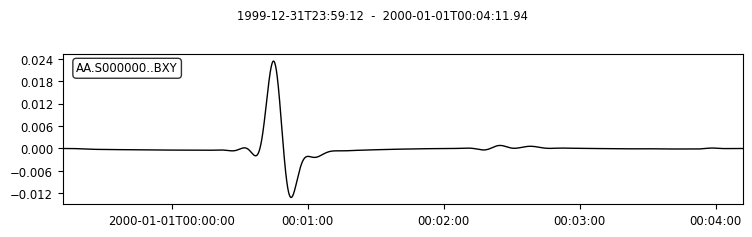

In [28]:
print(f"{ds.waveforms.list()}\n\n"
      f"{ds.waveforms.AA_S000000}\n\n"
      f"{ds.waveforms.AA_S000000.synthetic_i01s00}\n\n")

ds.waveforms.AA_S000000.synthetic_i01s00.plot(show=False)

In [29]:
print(f"{ds.auxiliary_data}\n\n"
      f"{ds.auxiliary_data.AdjointSources}\n\n"
      f"{ds.auxiliary_data.AdjointSources.i01}\n\n",
      f"{ds.auxiliary_data.AdjointSources.i01.s00}\n\n"
      f"{ds.auxiliary_data.AdjointSources.i01.s00.AA_S000000_BXY}\n\n")

Data set contains the following auxiliary data types:
	AdjointSources (1 item(s))

1 auxiliary data sub group(s) of type 'AdjointSources' available:
	i01

1 auxiliary data sub group(s) of type 'AdjointSources/i01' available:
	s00

 32 auxiliary data item(s) of type 'AdjointSources/i01/s00' available:
	AA_S000000_BXY
	AA_S000001_BXY
	AA_S000002_BXY
	AA_S000003_BXY
	AA_S000004_BXY
	AA_S000005_BXY
	AA_S000006_BXY
	AA_S000007_BXY
	AA_S000008_BXY
	AA_S000009_BXY
	AA_S000010_BXY
	AA_S000011_BXY
	AA_S000012_BXY
	AA_S000013_BXY
	AA_S000014_BXY
	AA_S000015_BXY
	AA_S000016_BXY
	AA_S000017_BXY
	AA_S000018_BXY
	AA_S000019_BXY
	AA_S000020_BXY
	AA_S000021_BXY
	AA_S000022_BXY
	AA_S000023_BXY
	AA_S000024_BXY
	AA_S000025_BXY
	AA_S000026_BXY
	AA_S000027_BXY
	AA_S000028_BXY
	AA_S000029_BXY
	AA_S000030_BXY
	AA_S000031_BXY

Auxiliary Data of Type 'AdjointSources'
	Path: 'i01/s00/AA_S000000_BXY'
	Data shape: '(5000, 2)', dtype: 'float64'
	Parameters:
		adj_src_type: cc_traveltime_misfit
		component: BXY
		d

-----------
## 3) Run a Large-Scale Inversion w/ Pyatoa + L-BFGS

- Illustrate a multi-event, multi-station inversion workflow  
- We will run 3 iterations to show the L-BFGS optimization algorithm operates  
- Pyatao will again be used as the preprocess module

In [30]:
# Run the example problem
! rm -r /home/scoped/work/day_3/intro_seisflows/example_2
! mkdir -p /home/scoped/work/day_3/intro_seisflows/example_2

%cd /home/scoped/work/day_3/intro_seisflows/example_2

# Setup the example problem and run Example 2
! seisflows examples setup 2 -r /home/scoped/specfem2d --with_mpi --niter 3 --ntask 4 --nsta 10  
! seisflows par pyflex_preset default  # Turn on windowing so that we can illustrate Pyatoa's Inspector class
! seisflows submit

rm: cannot remove '/home/scoped/work/day_3/intro_seisflows/example_2': No such file or directory
/home/scoped/work/day_3/intro_seisflows/example_2

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(   

----------
You'll know the example above is finished when you get the following log message  

```bash
////////////////////////////////////////////////////////////////////////////////
                             COMPLETE ITERATION 03                              
////////////////////////////////////////////////////////////////////////////////
2022-10-07 01:02:26 (I) | setting current iteration to: 4
```

### 3a) Understanding Inversion Outputs

- SeisFlows by default has stored gradients, updated models and preprocessing files in the *output/* directory  
- Preprocessing files are stored in *output/pyaflowa*

In [31]:
! ls output

GRADIENT_01  GRADIENT_03  MODEL_02  MODEL_INIT	pyaflowa
GRADIENT_02  MODEL_01	  MODEL_03  MODEL_TRUE


Figure(707.107x707.107)


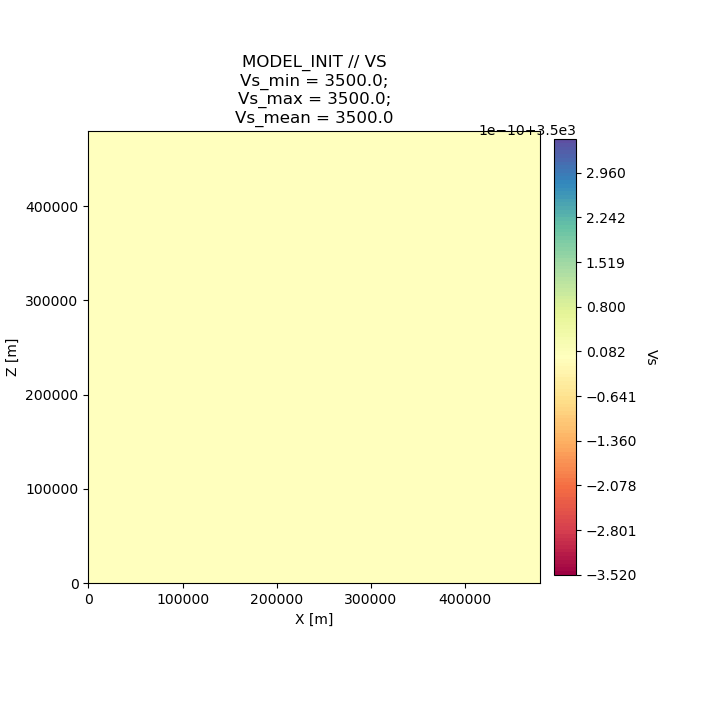

In [32]:
# Visualize updated models 
! seisflows plot2d MODEL_INIT vs --savefig m_init_vs.png
Image("m_init_vs.png")

Figure(707.107x707.107)


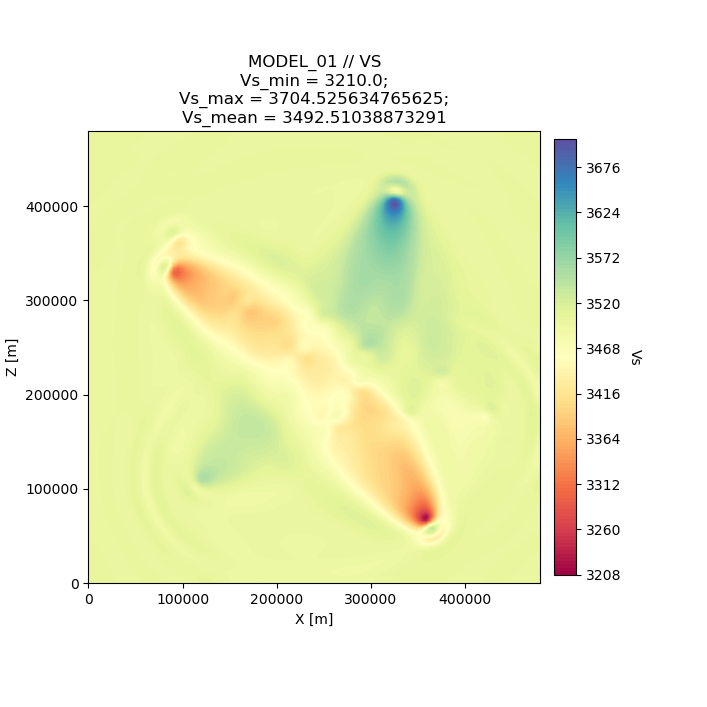

In [33]:
# Visualize updated models 
! seisflows plot2d MODEL_01 vs --savefig m_01_vs.png
Image("m_01_vs.png")

Figure(707.107x707.107)


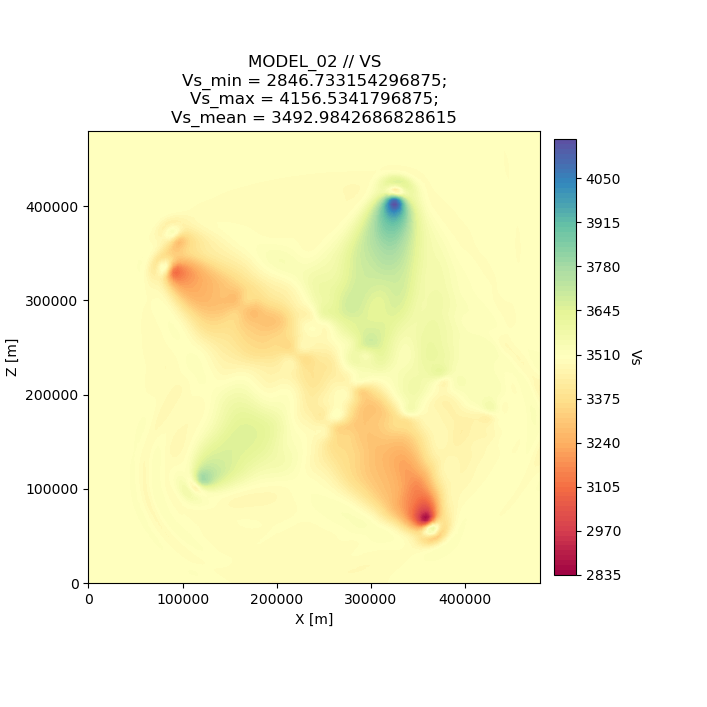

In [34]:
# Visualize updated models 
! seisflows plot2d MODEL_02 vs --savefig m_02_vs.png
Image("m_02_vs.png")

Figure(707.107x707.107)


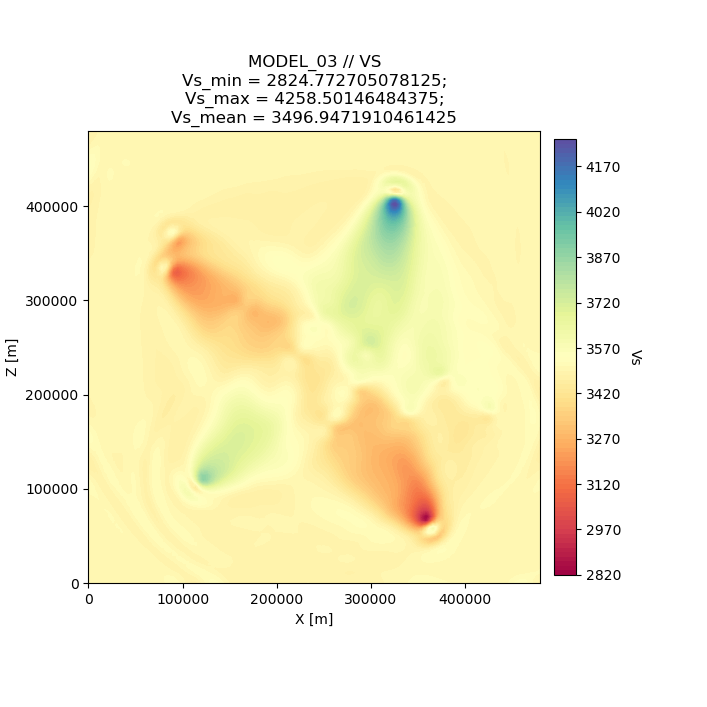

In [35]:
# Visualize updated models 
! seisflows plot2d MODEL_03 vs --savefig m_03_vs.png
Image("m_03_vs.png")

Figure(707.107x707.107)


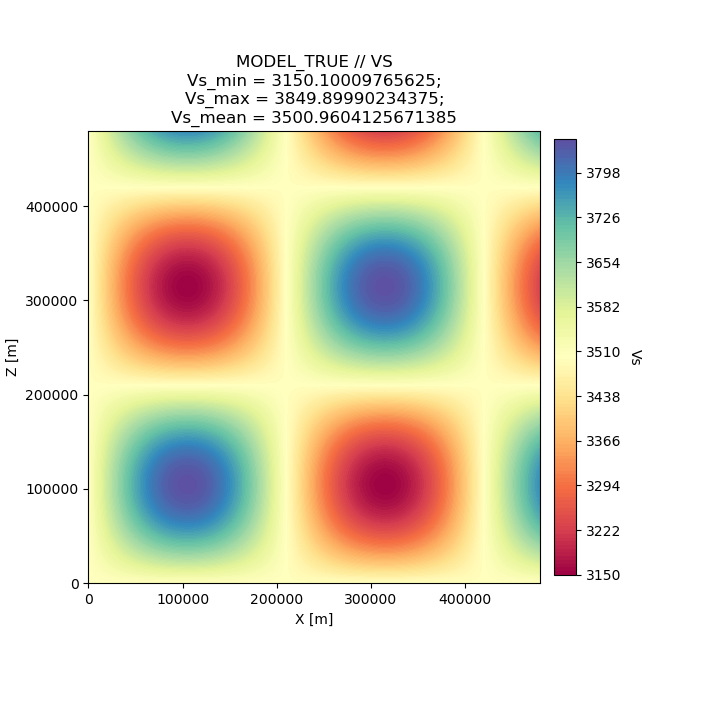

In [36]:
# Visualize updated models 
! seisflows plot2d MODEL_TRUE vs --savefig m_true_vs.png
Image("m_true_vs.png")